### Standard

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt



In [6]:
data = pd.read_csv('Salary_Data.csv')
print(data.head())
print(data.shape)


   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
(30, 2)


In [7]:
X = data['YearsExperience'].values.reshape(-1, 1)
y = data['Salary'].values.reshape(-1, 1)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)



In [10]:
model = Sequential([
    Dense(3, activation='relu', input_shape=(X_train_scaled.shape[1],)), # Hidden layer with 3 neurons, ReLU activation
    Dense(1)                                                            # Output layer with 1 neuron (for regression)
])

model.compile(optimizer='adam', loss='mse')

epochs = 500
history = model.fit(X_train_scaled, y_train_scaled, epochs=epochs, verbose=1)

print("Training finished!")



Epoch 1/500


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.6655
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.6613
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.6572
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 0.6530
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - loss: 0.6489
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.6447
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.6406
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.6365
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.6324
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.6283
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 0.6243
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.6203
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.6162
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 0.6123
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.6083
Epoch 16/500
1/1 ━━━━━━━━━━━

In [11]:
loss = model.evaluate(X_test_scaled, y_test_scaled, verbose=0)
print(f"Test Loss (Mean Squared Error - Scaled): {loss:.2f}")

y_pred_scaled = model.predict(X_test_scaled)

y_pred = scaler_y.inverse_transform(y_pred_scaled)

test_mse = mean_squared_error(y_test, y_pred)
print(f"Test Loss (Mean Squared Error - Unscaled): {test_mse:.2f}")



Test Loss (Mean Squared Error - Scaled): 0.08
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Test Loss (Mean Squared Error - Unscaled): 51079746.46


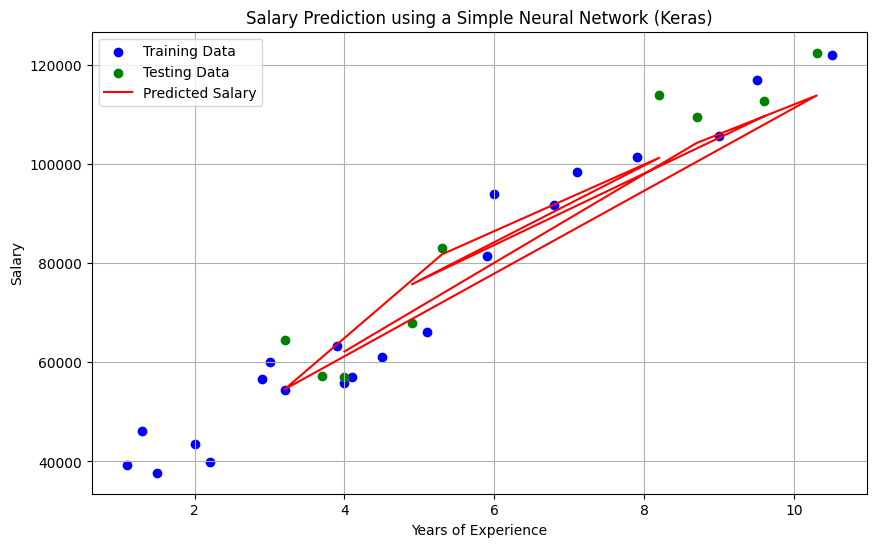

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Testing Data')
plt.plot(X_test, y_pred, color='red', label='Predicted Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary Prediction using a Simple Neural Network (Keras)')
plt.legend()
plt.grid(True)
plt.show()



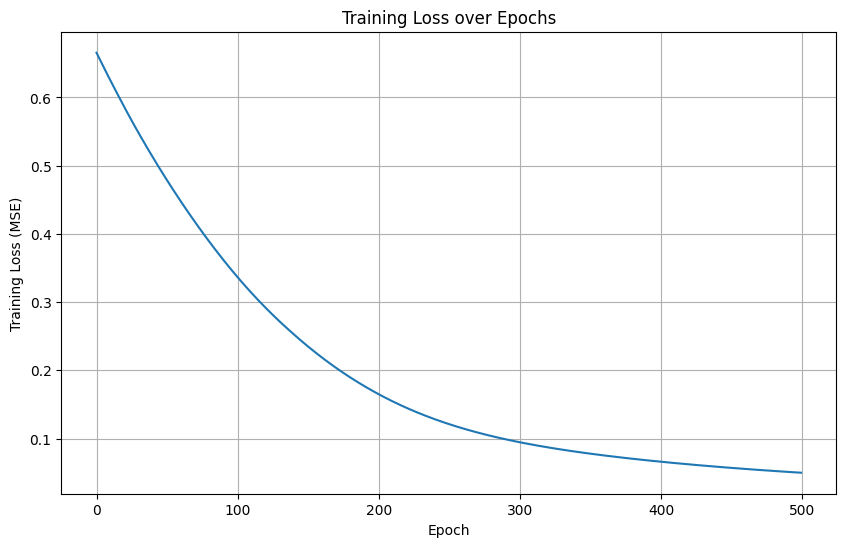

In [13]:
# Training loss over epochs !
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Training Loss (MSE)')
plt.title('Training Loss over Epochs')
plt.grid(True)
plt.show()